In [ ]:
!pip install dash    #install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.1 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv('heart.csv')
print(df.head)


<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])



In [ ]:
print(df.head)

<bound method NDFrame.head of      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseA

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop('HeartDisease', axis=1)  # Adjust 'target_variable' to the actual target column name
y = df['HeartDisease']

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from dash import dash_table


# Initialize the Dash app
app = dash.Dash(__name__)
df = pd.read_csv('heart.csv')
# Define available features for correlation
available_features = df.columns

# Define the app layout
app.layout = html.Div([
    html.H1("Correlation Matrix"),

    # Dropdown for selecting features
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': feature, 'value': feature} for feature in available_features],
        multi=True,
        value=[available_features[0], available_features[3]]  # Default selected features
    ),

    # Correlation matrix table
    dash_table.DataTable(id='correlation-matrix-table'),

])

# Define callback to update the correlation matrix table
@app.callback(
    Output('correlation-matrix-table', 'data'),
    [Input('feature-dropdown', 'value')]
)
def update_correlation_matrix(selected_features):
    selected_df = df[selected_features]
    correlation_matrix = selected_df.corr()
    correlation_matrix = correlation_matrix.reset_index()
    correlation_matrix = correlation_matrix.round(3)
    correlation_matrix_data = correlation_matrix.to_dict('records')
    return correlation_matrix_data

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:

# Initialize the Dash app
app = dash.Dash(__name__)

# Define available features for the dropdown
available_features = df.columns

# Define the app layout
app.layout = html.Div([
    html.H1("Scatter Plot with Dash"),

    # Dropdowns for selecting features
    html.Label('Select X-axis feature:'),
    dcc.Dropdown(
        id='x-axis-dropdown',
        options=[{'label': feature, 'value': feature} for feature in available_features],
        value=available_features[0]
    ),

    html.Label('Select Y-axis feature:'),
    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[{'label': feature, 'value': feature} for feature in available_features],
        value=available_features[1]
    ),

    # Scatter plot
    dcc.Graph(id='scatter-plot'),
])

# Define callback to update the scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value')]
)
def update_scatter_plot(selected_x, selected_y):
    fig = px.scatter(df, x=selected_x, y=selected_y, title=f"Scatter Plot: {selected_x} vs {selected_y}")
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port = 8050)

<IPython.core.display.Javascript object>

In [ ]:
color_discrete_map = {0: 'cadetblue', 1: 'blueviolet'}
px.histogram(df,x='Age',color='HeartDisease',color_discrete_map=color_discrete_map).update_layout(title='Age Distribution')

Text(0.5, 1.0, 'Total People by Sex and HeartDisease')

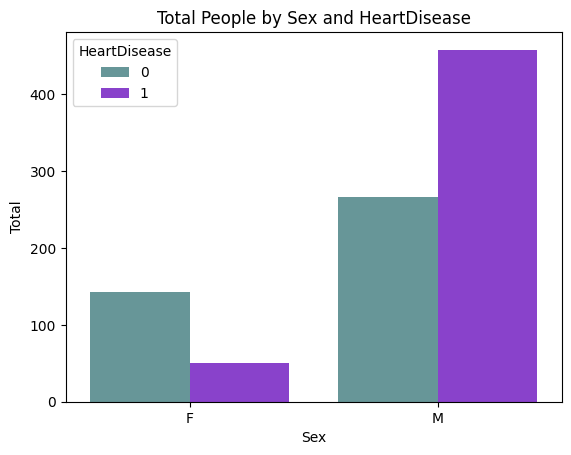

In [ ]:

df_sex_heart = df.groupby(['Sex','HeartDisease'])['Sex'].count().reset_index(name='Total')
sns.barplot(data=df_sex_heart,x='Sex',y='Total',hue='HeartDisease', palette= color_discrete_map )
plt.title('Total People by Sex and HeartDisease')

In [ ]:

px.pie(values=df['ChestPainType'].value_counts(),names =df['ChestPainType'].value_counts().index,color_discrete_sequence=['springgreen','steelblue','tan','teal']).update_layout(title='Chest Pain Type')


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:,[3,4]] = imp.fit_transform(X[:,[3,4]])

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [1,2,6,8,10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
sc = StandardScaler()
X_train[:, [9,10,11,13,14]] = sc.fit_transform(X_train[:, [9,10,11,13,14]])
X_test[:, [9,10,11,13,14]] = sc.transform(X_test[:, [9,10,11,13,14]])

Accuracy =  89.13  %


Text(0.5, 1.0, 'Logistic Regresstion Confusion Matrix')

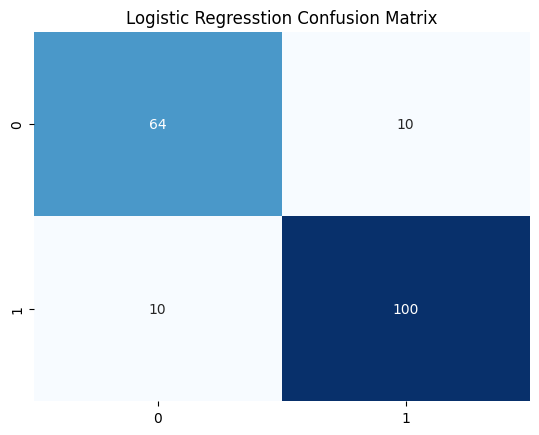

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix')

Accuracy =  87.5  %


Text(0.5, 1.0, 'K-Nearest Neighbors Confusion Matrix')

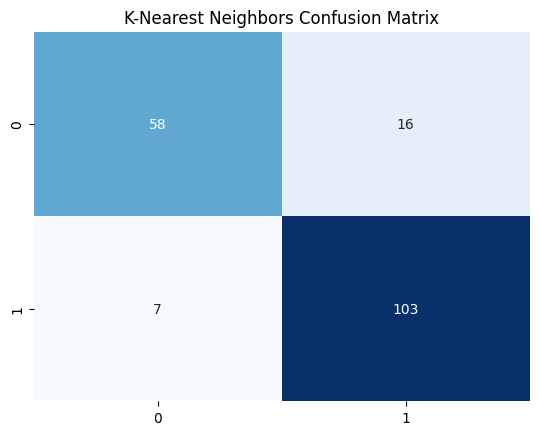

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , knn_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('K-Nearest Neighbors Confusion Matrix')

Accuracy =  91.3  %


Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix')

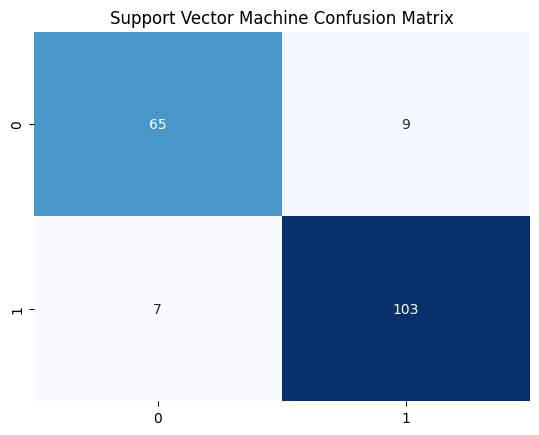

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_train_acc = round(accuracy_score(y_train,svm.predict(X_train))*100,2)
svm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , svm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Support Vector Machine Confusion Matrix')

Accuracy =  90.76  %


Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

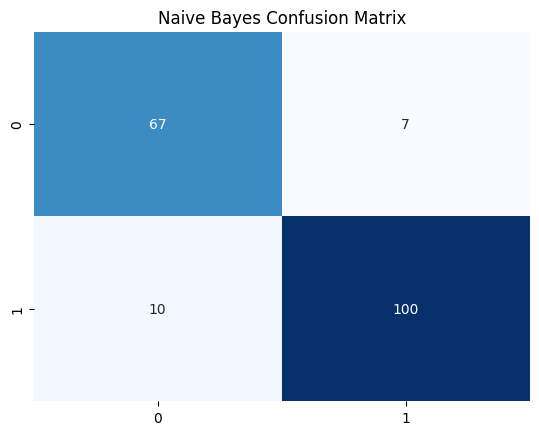

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Naive Bayes Confusion Matrix')

Accuracy =  90.22  %


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

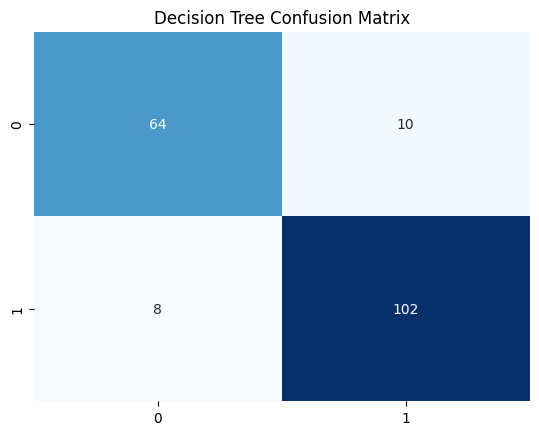

In [ ]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix')